In [ ]:
import os
import re
import glob
import cv2 as cv
import numpy as np
import pandas as pd
import imutils as im # file created by Rafael
import datetime as dt
import matplotlib.pyplot as plt
from skimage.morphology import remove_small_holes, remove_small_objects, disk, opening, closing
import sys

In [ ]:
# Load the images
path = 'lighting_V1/'
images = glob.glob(path + '*.jpg')
images.sort()
print('Number of images:', len(images))

# Display the images in a 4 by 2 grid
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for i in range(4):
    for j in range(2):
        img = cv.imread(images[i*2+j])
        ax[i, j].imshow(img)
        ax[i, j].axis('off')
        ax[i, j].set_title(images[i*2+j])
plt.show()

In [ ]:
# Display the images in HSV
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for i in range(4):
    for j in range(2):
        img = cv.imread(images[i*2+j])
        img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
        ax[i, j].imshow(img)
        ax[i, j].axis('off')
        ax[i, j].set_title(images[i*2+j])
plt.show()

In [ ]:
# Superimpose the HSV images on top of the normal images at 50% transparency
weight = 0.6
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for i in range(4):
    for j in range(2):
        img = cv.imread(images[i*2+j])
        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
        ax[i, j].imshow(cv.addWeighted(img, weight, hsv, 1-weight, 0))
        ax[i, j].axis('off')
        ax[i, j].set_title(images[i*2+j])
plt.show()

In [ ]:
# plot all images in winter_cluster_img in grayscale
path = 'winter_cluster_img/'
images = glob.glob(path + '*.jpg')
images.sort()
print('Number of images:', len(images))

# Display the images in a 4 by 2 grid
# fig, ax = plt.subplots(4, 2, figsize=(15, 15))
# for i in range(4):
#     for j in range(2):
#         img = cv.imread(images[i*2+j], cv.IMREAD_GRAYSCALE)
#         ax[i, j].imshow(img, cmap='gray')
#         ax[i, j].axis('off')
#         ax[i, j].set_title(images[i*2+j])
img = cv.imread(images[0], cv.IMREAD_GRAYSCALE)
print(img.shape)

In [ ]:
# Plot the histogram of gray levels for each image
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for i in range(4):
    for j in range(2):
        img = cv.imread(images[i*2+j], cv.IMREAD_GRAYSCALE)
        ax[i, j].hist(img.ravel(), 256, [0, 256])
        ax[i, j].set_title(images[i*2+j])
plt.show()

In [ ]:
# Do a transformation on the images h1r3_2.jpg

threshold = 80
img = cv.imread(images[6], cv.IMREAD_GRAYSCALE)
print(img.shape)
# gaussian blur
# img_tmp = cv.resize(cv.GaussianBlur(img, (7, 7), 0), (0, 0), fx=0.1, fy=0.1)
img_tmp = cv.GaussianBlur(img, (7, 7), 0)
_, img_tmp = cv.threshold(img_tmp, threshold, 255, cv.THRESH_BINARY)
img_tmp1000 = remove_small_objects(img_tmp, min_size=1000)
img_tmp1000 = remove_small_holes(img_tmp1000, area_threshold=1000)
# img_tmp2000 = remove_small_objects(~img_tmp, min_size=2000)
# img_tmp2000 = remove_small_holes(img_tmp2000, area_threshold=2000)
# img_tmp4000 = remove_small_objects(~img_tmp, min_size=4000)
# img_tmp4000 = remove_small_holes(img_tmp4000, area_threshold=4000)
# img_tmp8000 = remove_small_objects(~img_tmp, min_size=8000)
# img_tmp8000 = remove_small_holes(img_tmp8000, area_threshold=8000)
# plot img
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(img_tmp1000, cmap='gray')
ax[1].axis('off')
ax[1].set_title('1000')
# ax[2].imshow(img_tmp2000, cmap='gray')
# ax[2].axis('off')
# ax[2].set_title('2000')
# ax[3].imshow(img_tmp4000, cmap='gray')
# ax[3].axis('off')
# ax[3].set_title('4000')
# ax[4].imshow(img_tmp8000, cmap='gray')
# ax[4].axis('off')
# ax[4].set_title('8000')
print(img_tmp1000.shape)
plt.show()

In [ ]:
#close then open the mask
img_tmp1000_co = opening(closing(img_tmp1000, disk(9)), disk(9))
# show img_tmp8000 
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.imshow(img_tmp1000_co)
ax.axis('off')
ax.set_title('1000')
plt.show()


In [ ]:
# open then close the mask
img_tmp1000_oc = closing(opening(img_tmp1000, disk(9)), disk(9))
# show img_tmp8000
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.imshow(img_tmp1000_oc)
ax.axis('off')
ax.set_title('1000')
plt.show()

In [ ]:
print(img_tmp1000_oc.shape)
print(img_tmp1000_oc.dtype)

In [ ]:
img_contour = img_tmp1000_oc.copy().astype(np.uint8) #
contours, _ = cv.findContours(img_contour, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
img_contour = cv.cvtColor(img_contour, cv.COLOR_GRAY2BGR)
cv.drawContours(img_contour, contours, -1, (0, 255, 0), 2)

# show img_contour
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.imshow(img_contour)
ax.axis('off')
plt.show()

In [ ]:
print(len(contours))
sorted_contours = sorted(contours, key=cv.contourArea, reverse=True)
print(len(sorted_contours))

cv.drawContours(img_contour, sorted_contours, 0, (0,0,255), 3)
plt.imshow(img_tmp1000_oc)
plt.show()
plt.imshow(img_contour)
plt.show()

In [ ]:
img1 = cv.imread(images[6], cv.IMREAD_GRAYSCALE)
img1_tmp = cv.threshold(cv.GaussianBlur(img1, (7, 7), 0), threshold, 255, cv.THRESH_BINARY)[1]
print(type(img1_tmp[0, 0]))

contours, hierarchy = cv.findContours(img1_tmp, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))
sorted_contours = sorted(contours, key=cv.contourArea, reverse=True)

cv.drawContours(img1_tmp, sorted_contours, 0, (0,0,255), 3)
plt.imshow(img1)
plt.show()
plt.imshow(img1_tmp)
plt.show()

In [ ]:
# Function that finds the 4 connected neighbors of a pixel
def get_neighbors(seed, shape):
    neighbors = []
    if (seed[0] > 0) :          neighbors.append((seed[0]-1, seed[1]))  #left
    if (seed[0] < shape[0]-1) : neighbors.append((seed[0]+1, seed[1]))  #right
    if (seed[1] > 0) :          neighbors.append((seed[0], seed[1]-1))  #up
    if (seed[1] < shape[1]-1) : neighbors.append((seed[0], seed[1]+1))  #down
    return neighbors

# Iterative function that sets the visited pixels to 1 and counts the number of pixels in the cluster
def region_growing_cluster(img, seed, visited, area):
    
    # Enter the function at the position of a pixel --> set it to 1 in the visited table
    visited[seed] = 1
    
    # Get the neighbors of the pixel
    neighbors = get_neighbors(seed, img.shape)
    
    # Iterate over the neighbors and if they are still not visited and
    # they are part of a cluster, call the function again
    for neighbor in neighbors:
        if (visited[neighbor] == 0) & (img[neighbor]):
            area += 1 # We increment the number of pixels in the axon
            area = region_growing_cluster(img, neighbor, visited, area)
            
    # And the we return the number of pixels in the axon (area)
    return area

# This function is to go through all the pixels in the image
def find_all_cluster(img):
    
    # First initialize the visited table
    visited = np.zeros_like(img)
    
    # We will also need to store the position of each axons and their radius
    biggest_cluster_pos = (0,0)
    biggest_cluster_area = 0

    
    # Then we iterate over the image
    x_max, y_max = img.shape
    for x in range(x_max-1):
        for y in range(y_max-1):
            
            # If the pixel is not visited and it is part of an axon (white pixel)
            if (visited[x,y] == 0) & (img[x,y]):
                
                # Then we set the initial area to 1 (one pixel) before looking for its neighbors
                area = 1
                area = region_growing_cluster(img, (x,y), visited, area)
                
                # Once the region growing algorithm is done, it means that we have finished with one cluster
                # Compare the area of the cluster with the biggest one found so far
                if area > biggest_cluster_area:
                    biggest_cluster_area = area
                    biggest_cluster_pos = (x,y)

                
    # Return the position of the seeds and the area of the cluster
    return biggest_cluster_pos, biggest_cluster_area


# We can try our algorithm on a portion of the ground truth image*
win = 500 #window zoom
pos, area = find_all_cluster(img_tmp1000_oc)
print('Position of the cluster:', pos)
print('Area of the cluster:', area)


# Now we plot the results
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.imshow(img_tmp1000_oc, cmap='gray', interpolation='nearest')
ax.set_title('window')
ax.axis('off')

# We can display the positions and the radius of each detexted axon

ax.plot(pos[1], pos[0], 'ro')
ax.text(pos[1]-1, pos[0]-2, area, color='r')
plt.show()

# ---------------------------------------------------------

# Code propre

In [1]:
import os
import re
import glob
import cv2 as cv
import numpy as np
import pandas as pd
import imutils as im # file created by Rafael
import datetime as dt
import matplotlib.pyplot as plt
from skimage.morphology import remove_small_holes, remove_small_objects, disk, opening, closing
import sys

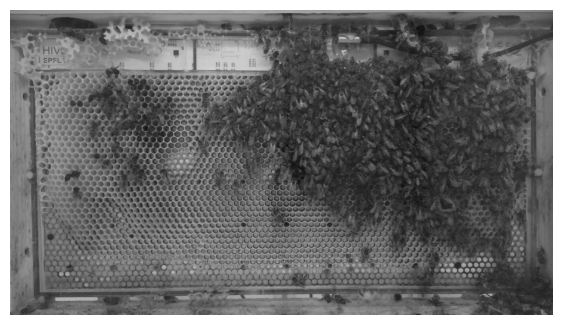

In [11]:
img = cv.imread('winter_cluster_img/h2r1_s_2500_lp_2.5.jpg', cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(img, cmap='gray')
ax.axis('off')
plt.show()

In [3]:
threshold = 80 #arbitrary for now
img_tmp = cv.GaussianBlur(img, (7, 7), 0) #blur cause it never caused any harm
_, img_tmp = cv.threshold(img_tmp, threshold, 255, cv.THRESH_BINARY) #thresholding

# some morphological operations (this take lil bit of time)
img_tmp1000 = remove_small_objects(img_tmp, min_size=1000) #remove small objects
img_tmp1000 = remove_small_holes(img_tmp1000, area_threshold=1000) #remove small holes
img_tmp1000_oc = closing(opening(img_tmp1000, disk(9)), disk(9)) #open then close the mask

/var/folders/81/88qz8hc518d6msz681nh39mm0000gn/T/ipykernel_22172/322064222.py:7: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_tmp1000 = remove_small_holes(img_tmp1000, area_threshold=1000) #remove small holes


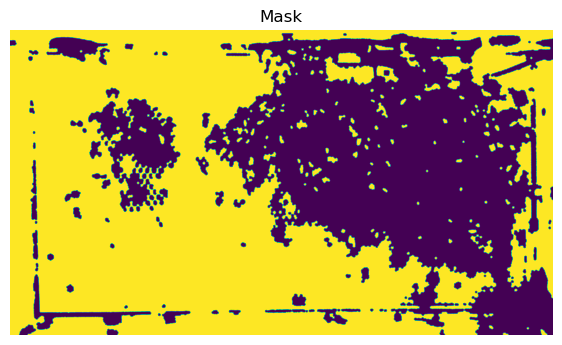

In [9]:
# show the mask
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(img_tmp1000_oc)
ax.axis('off')
ax.set_title('Mask')
plt.show()

In [5]:
# now we can find the contours
img_contour = (~img_tmp1000_oc).astype(np.uint8) #cast as uint8 because findContours only accepts uint8
contours, _ = cv.findContours(img_contour, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) #find contours
contour = max(contours, key=cv.contourArea) #get the biggest contour
img_contour = cv.cvtColor(img_contour, cv.COLOR_GRAY2BGR) #convert to BGR because drawContours only accepts BGR
cv.drawContours(img_contour, contour, -1, (0, 255, 0), 2) #draw the biggest contour
print(len(contours)) #number of contours

103


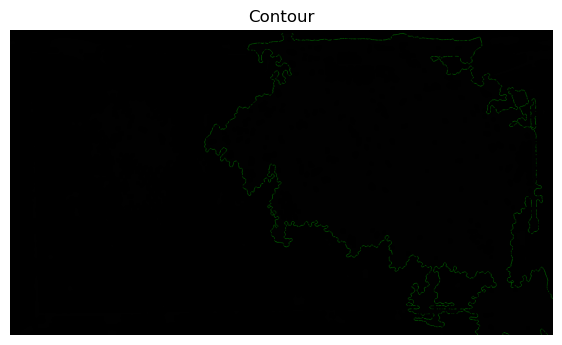

In [12]:
# show the contour
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(img_contour)
ax.axis('off')
ax.set_title('Contour')
plt.show()

In [ ]:
print(img_contour.dtype)
print(img.dtype)